# Naive Bayes (the easy way)

We'll cheat by using sklearn.naive_bayes to train a spam classifier! Most of the code is just loading our training data into a pandas DataFrame that we can play with:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

Let's have a look at that DataFrame:

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
#df = pd.read_csv('dataset.csv', encoding='latin-1')

df = pd.read_csv('new_dataset.csv')

In [4]:
#df.drop([2, 3, 4, 5, 6, 7], axis = 1, inplace = True)
df

,wiki_question,define electrons
0,location,where is my location
1,location,where am i located
2,location,find my current location okay
3,location,where is my location
4,bank_details,what is my bank statement ?
...,...,...
66,wiki_question,tell me how to locate italy in the world map
67,wiki_question,describe how evolution works
68,wiki_question,describe the meaning of how the atom works
69,wiki_question,is nigeria the only nation in africa ?


In [5]:
df.count() 
df.columns = ['label', 'message']

In [6]:
df['label'].value_counts() 

bank_details     25
location         24
wiki_question    22
Name: label, dtype: int64

In [7]:
# Describing the dataset containing conversaions, and question.
df.groupby('label').describe() 

message                                          
                count unique                           top freq
label                                                          
bank_details       25     25   what is my bank statement ?    1
location           24     22          where is my location    2
wiki_question      22     22    tell me about fela anikuti    1

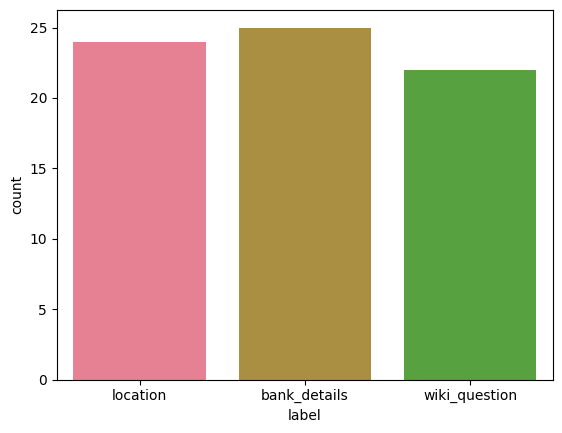

In [8]:
sns.countplot(data=df, x='label')
plt.show() 

In [9]:
df.head(1000) 

,label,message
0,location,where is my location
1,location,where am i located
2,location,find my current location okay
3,location,where is my location
4,bank_details,what is my bank statement ?
...,...,...
66,wiki_question,tell me how to locate italy in the world map
67,wiki_question,describe how evolution works
68,wiki_question,describe the meaning of how the atom works
69,wiki_question,is nigeria the only nation in africa ?


In [11]:
# Cleaning the text
import string 
#from nltk.corpus import stopwords 
from nltk import PorterStemmer as Stemmer
def process(text):
    # turn the texts into lowercase
    text = text.lower() 
    # remove punctuation
    text = ''.join([t for t in text if t not in string.punctuation])
    # remove stopwords 
    # text = [t for t in text.split() if t not in stopwords.words('english')]
    # Stemming the words 
    stemmer = Stemmer() 
    text = [stemmer.stem(t) for t in text]
    # Return the token list 
    return text 

Let's try it out:

In [12]:
# testing the function 
process('it is a holiday, and we are playing cricket. jeff is playing very well')

['i',
 't',
 ' ',
 'i',
 's',
 ' ',
 'a',
 ' ',
 'h',
 'o',
 'l',
 'i',
 'd',
 'a',
 'y',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'w',
 'e',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 'p',
 'l',
 'a',
 'y',
 'i',
 'n',
 'g',
 ' ',
 'c',
 'r',
 'i',
 'c',
 'k',
 'e',
 't',
 ' ',
 'j',
 'e',
 'f',
 'f',
 ' ',
 'i',
 's',
 ' ',
 'p',
 'l',
 'a',
 'y',
 'i',
 'n',
 'g',
 ' ',
 'v',
 'e',
 'r',
 'y',
 ' ',
 'w',
 'e',
 'l',
 'l']

In [13]:
# Testing it against our dataset
df['message'][:20].apply(process)

0     [ , w, h, e, r, e,  , i, s,  , m, y,  , l, o, ...
1     [ , w, h, e, r, e,  , a, m,  , i,  , l, o, c, ...
2     [ , f, i, n, d,  , m, y,  , c, u, r, r, e, n, ...
3     [ , w, h, e, r, e,  , i, s,  , m, y,  , l, o, ...
4     [ , w, h, a, t,  , i, s,  , m, y,  , b, a, n, ...
5     [ , i,  , w, a, n, t,  , t, o,  , k, n, o, w, ...
6     [ , f, i, n, d,  , m, y,  , l, o, c, a, t, i, ...
7     [ , w, h, e, r, e,  , a, m,  , i,  , l, o, c, ...
8     [ , g, i, v, e,  , m, e,  , m, y,  , b, a, n, ...
9     [ , f, i, n, d,  , m, y,  , l, o, c, a, t, i, ...
10    [ , t, e, l, l,  , m, e,  , a, b, o, u, t,  , ...
11    [ , l, o, c, a, t, e,  , t, h, i, s,  , p, l, ...
12    [ , w, h, a, t,  , i, s,  , m, y,  , b, a, n, ...
13    [ , m, y,  , a, c, c, o, u, n, t,  , b, a, l, ...
14    [ , m, y,  , b, a, n, k,  , s, t, a, t, e, m, ...
15    [ , t, e, l, l,  , m, e,  , h, o, w,  , m, u, ...
16    [ , s, o,  , h, o, w,  , m, u, c, h,  , d, o, ...
17    [ , t, e, l, l,  , m, e,  , h, o, w,  , m,

In [14]:
# 
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
tfidfv = TfidfVectorizer(analyzer = process)
data = tfidfv.fit_transform(df['message'])

In [16]:
mess_id = df.iloc[2]['message']
print(mess_id)

 find my current location okay


In [17]:
print(tfidfv.transform([mess_id]))

  (0, 23)	0.2829149437484565
  (0, 20)	0.16903685702284818
  (0, 19)	0.21161343737067817
  (0, 17)	0.3213444579757563
  (0, 15)	0.3405761246678105
  (0, 14)	0.3405761246678105
  (0, 13)	0.11036091736785993
  (0, 12)	0.12737927768455656
  (0, 11)	0.18841844627572876
  (0, 10)	0.21763606011492628
  (0, 7)	0.2083539989174512
  (0, 6)	0.10288952636031327
  (0, 5)	0.16616455171818778
  (0, 4)	0.24388061760737068
  (0, 2)	0.20292884294383617
  (0, 0)	0.4667127852558165


In [18]:
## Building a model 
from sklearn.pipeline import Pipeline 
from sklearn.naive_bayes import MultinomialNB 
model = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer=process)),
     ('classifier', MultinomialNB())
    
])

In [19]:
# performing a training and a spliting test 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.20, random_state = 21)

In [20]:
# Training the Spam filter 
model.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer=<function process at 0x76067f953200>)),
                ('classifier', MultinomialNB())])

In [21]:
predictions = model.predict(x_test)
model.score(x_test, y_test)

0.7333333333333333

In [22]:
# Defining a function to run and use the model for classfication.
def detect_conversation(s):
    result = model.predict([s])[0]
    #return result
    print(result)

detect_conversation('where am i located ?')

wiki_question


In [23]:
value = ['hello, how far', 'can you find out who that person is?']
for i in value:
    detect_conversation(i)

wiki_question
wiki_question


In [24]:
# Saving the pickle file into memory 
import pickle 
filename = 'question_model.pkl'

In [25]:
# save the model to disk
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.7333333333333333


In [26]:
# Saving the model to disk 
pickle.dump([df, model], open(filename, 'wb'))

In [35]:
import joblib

# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(model, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(x_test, y_test)
print(result)

0.7333333333333333


In [31]:
# save the model to disk
filename = 'finalized_model.sav'
 
# load the model from disk
model = joblib.load(filename)

In [32]:
model.predict(['so uhm, i was hunngry and i want to know i much i have in my bank now ?'])[0]

'bank_details'

In [34]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(x_test, y_test)
print(result)

0.7333333333333333


In [23]:
! pip install joblib